## Movie data Model Prediction

MOVIE RATING PREDICTION WITH PYTHON
Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

!pip install xgboost
!pip install xgboost scikit-learn
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb

In [2]:
df = pd.read_csv('Movie data analyse.csv', encoding='latin-1')
print(df.head(10))

                                 Name    Year Duration  \
0                                         NaN      NaN   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
2                         #Homecoming -2021.0   90 min   
3                             #Yaaram -2019.0  110 min   
4                   ...And Once Again -2010.0  105 min   
5                ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                           ...Yahaan -2005.0  142 min   
7                      .in for Motion -2008.0   59 min   
8                  ?: A Question Mark -2012.0   82 min   
9                            @Andheri -2014.0  116 min   

                       Genre  Rating  Votes            Director  \
0                      Drama     NaN    NaN       J.S. Randhawa   
1                      Drama     7.0      8       Gaurav Bakshi   
2             Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3            Comedy, Romance     4.4     35          Ovais Khan   
4                      Dra

In [3]:
# Remove '$' and 'M' symbols, and commas
df['Votes'] = df['Votes'].replace({'\$': '', 'M': '', ',': ''}, regex=True)

df['Votes'] = df['Votes'].astype(str).str.replace(',', '')
# Convert the cleaned column to float
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [4]:
## Filling missing value

In [5]:
df['Year'] = df['Year'].fillna(df['Year'].median()).astype(int) # Filling with median year
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)  # Convert duration to numeric
df['Duration'] = df['Duration'].fillna(df['Duration'].median())  # Filling with median duration
df['Genre'] = df['Genre'].fillna('Unknown')  # Filling with 'Unknown' for missing genres
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  # Filling with mean rating

df['Votes'] = df['Votes'].fillna(df['Votes'].median()).astype(int)  # Filling with median votes
df['Director'] = df['Director'].fillna('Unknown')  # Filling with 'Unknown' for missing directors
df['Actor 1'] = df['Actor 1'].fillna('Unknown')  # Filling with 'Unknown' for missing actors
df['Actor 2'] = df['Actor 2'].fillna('Unknown')
df['Actor 3'] = df['Actor 3'].fillna('Unknown')

#Exploratory Data Analysis (EDA)

#1 Year with Best Rating

In [6]:
best_year=df.groupby('Year')['Rating'].mean().idxmax()
best_rating = df.groupby('Year')['Rating'].mean().max()
print(f"The year with the best average rating is {best_year} with an average rating of {best_rating:.2f}")

The year with the best average rating is -1917 with an average rating of 6.70


#2 Impact of movie length on Rating?

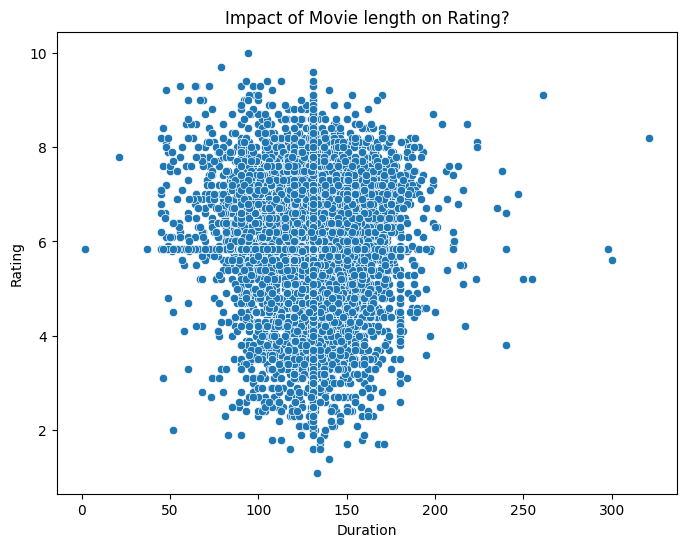

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration',y='Rating', data=df)
plt.title('Impact of Movie length on Rating?')
plt.show()

In [8]:
correlation = df['Duration'].corr(df['Rating'])
print(f"Correlation between movie duration and rating: {correlation}")

Correlation between movie duration and rating: -0.019885067445933928


In [9]:
df[['Duration','Rating']].corr()

,Duration,Rating
Duration,1.000000,-0.019885
Rating,-0.019885,1.000000


#3 Top 10 Movies by Rating per Year and Overall

In [10]:
# Top 10 movies per year by rating
top_movies_per_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating'))
print(top_movies_per_year[['Name', 'Rating']])

# Top 10 movies overall by rating
top_movies_overall = df.nlargest(10, 'Rating')
print(top_movies_overall[['Name', 'Rating']])

                                   Name    Rating
Year                                             
-2022 640                     Adipurush  5.841621
      1065                       Animal  5.841621
      1537              Baba Teerthnath  5.841621
      1557              Bachchan Pandey  5.841621
      1572                   Backwaters  5.841621
...                                 ...       ...
-1922 7337                        Karna  5.841621
-1917 8146                  Lanka Dahan  6.700000
-1915 3532   Death of Narayanrao Peshwa  5.841621
-1914 12575            Satyavan Savitri  5.841621
-1913 9473             Mohini Bhasmasur  5.841621

[934 rows x 2 columns]
                      Name  Rating
8339       Love Qubool Hai    10.0
5410            Half Songs     9.7
2563                 Breed     9.6
5077          Gho Gho Rani     9.4
6852                  June     9.4
11704             Ram-Path     9.4
14222  The Reluctant Crime     9.4
1314          Ashok Vatika     9.3
1729       

In [11]:
df[['Year','Rating']].corr()

,Year,Rating
Year,1.000000,0.097522
Rating,0.097522,1.000000


#4 Number of Popular Movies Released Each Year
#Let's assume movies with a rating of 7.5 or higher are "popular."

Year
-2021    33
-2020    44
-2019    63
-2018    52
-2017    38
         ..
-1943     5
-1942     1
-1940     2
-1938     1
-1934     1
Length: 83, dtype: int64


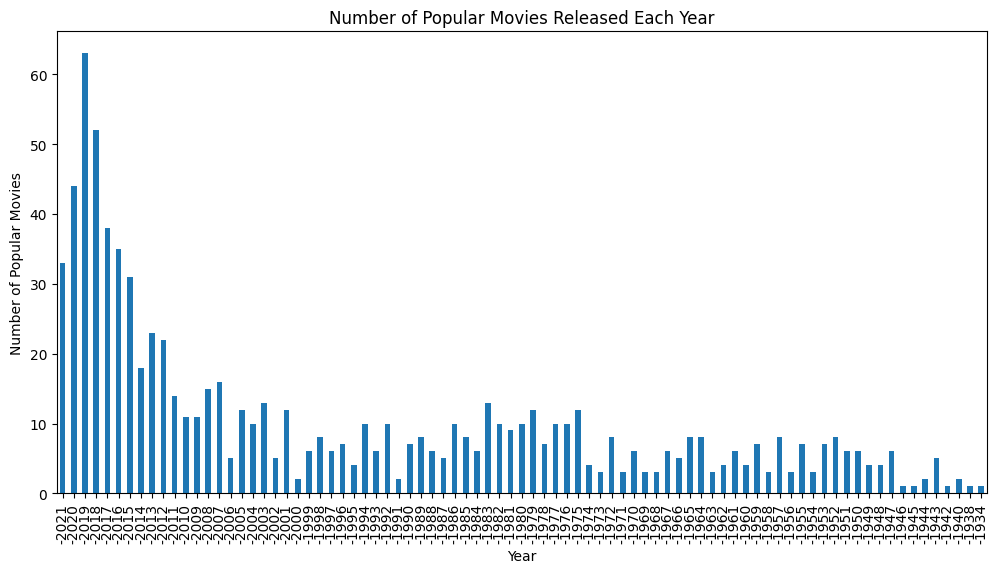

In [12]:
# Define a rating threshold for 'popular movies'
popular_movies_threshold = 7.5

# Count the number of popular movies each year
popular_movies_by_year = df[df['Rating'] >= popular_movies_threshold].groupby('Year').size()
print(popular_movies_by_year)

# Visualize the number of popular movies released per year
popular_movies_by_year.plot(kind='bar', figsize=(12,6))
plt.title('Number of Popular Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies')
plt.show()

#5Votes and Movie Performance
#Determine whether movies with more votes perform better.

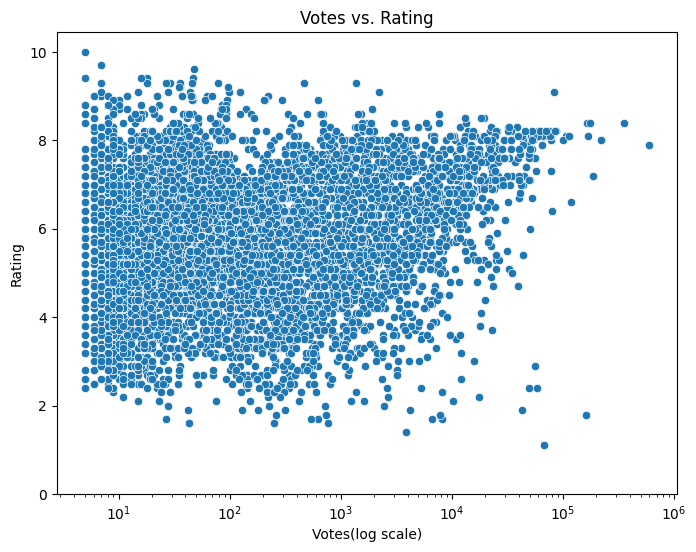

Correlation between Votes and Rating: 0.12582626630361812


In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Votes',y='Rating', data=df)
plt.ylim(0,)
plt.title('Votes vs. Rating')
plt.xscale('log')
plt.xlabel('Votes(log scale)')
plt.ylabel('Rating')
plt.show()

#Correlation
correlation_votes_rating=df['Votes'].corr(df['Rating'])
print(f"Correlation between Votes and Rating: {correlation_votes_rating}")

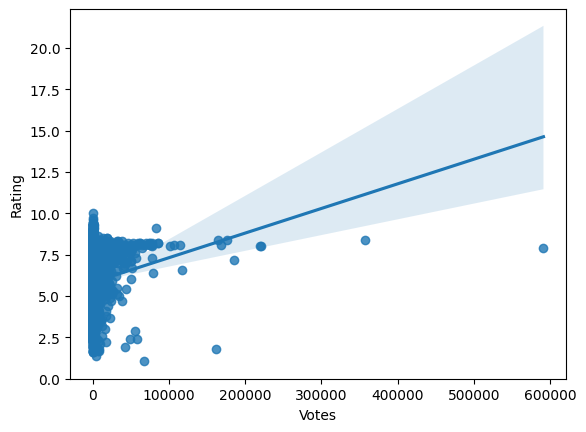

In [14]:
sns.regplot(x="Votes",y="Rating", data=df)
plt.ylim(0,)
plt.show()

#6 Director with the Most Movies
#Identify the director who has directed the most movies.

In [15]:
most_movies_directed=df["Director"].value_counts().idxmax()
print(f"The director with the most movies is: {most_movies_directed}")

The director with the most movies is: Unknown


#7 Actors with the Most Successful Movies
#Identify which actors consistently star in the highest-rated movies.

In [16]:
# Combining Actor columns to check overall
actors=pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
# Actor with most successful movies
successful_actors=actors.value_counts().head(10)
print("Top 10 Actor starring in the most successful movies:")
print(successful_actors)

Top 10 Actor starring in the most successful movies:
Unknown               7145
Mithun Chakraborty     241
Dharmendra             231
Ashok Kumar            227
Jeetendra              179
Amitabh Bachchan       178
Rekha                  142
Rajesh Khanna          139
Shashi Kapoor          133
Shatrughan Sinha       131
Name: count, dtype: int64


#8 Rating Trends Over Time
#Analyze how movie ratings have trended over time.

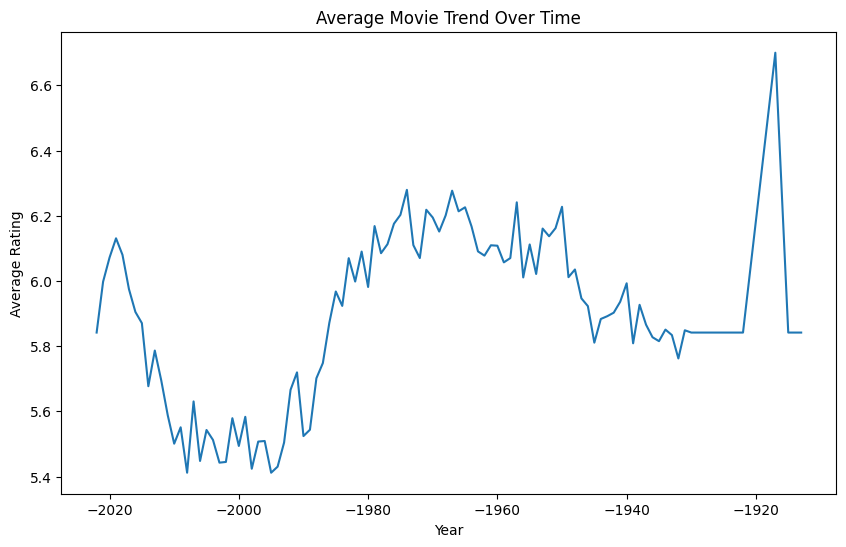

In [17]:
avg_rating_per_year= df.groupby('Year')['Rating'].mean()

plt.figure(figsize=(10,6))
avg_rating_per_year.plot()
plt.title('Average Movie Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

#Genre-Based Analysis
Which genres consistently receive high ratings?

We can group movies by genre and calculate the average rating for each genre.

Genre
History, Romance                9.4
Documentary, Family, History    9.3
Documentary, Sport              8.6
Biography, Family               8.3
Animation, Comedy, Family       8.3
                               ... 
Action, Crime, Sci-Fi           2.7
Action, Fantasy, Sci-Fi         2.7
Comedy, Horror, Musical         2.7
Action, Comedy, Horror          2.4
Comedy, Family, Sci-Fi          2.4
Name: Rating, Length: 486, dtype: float64


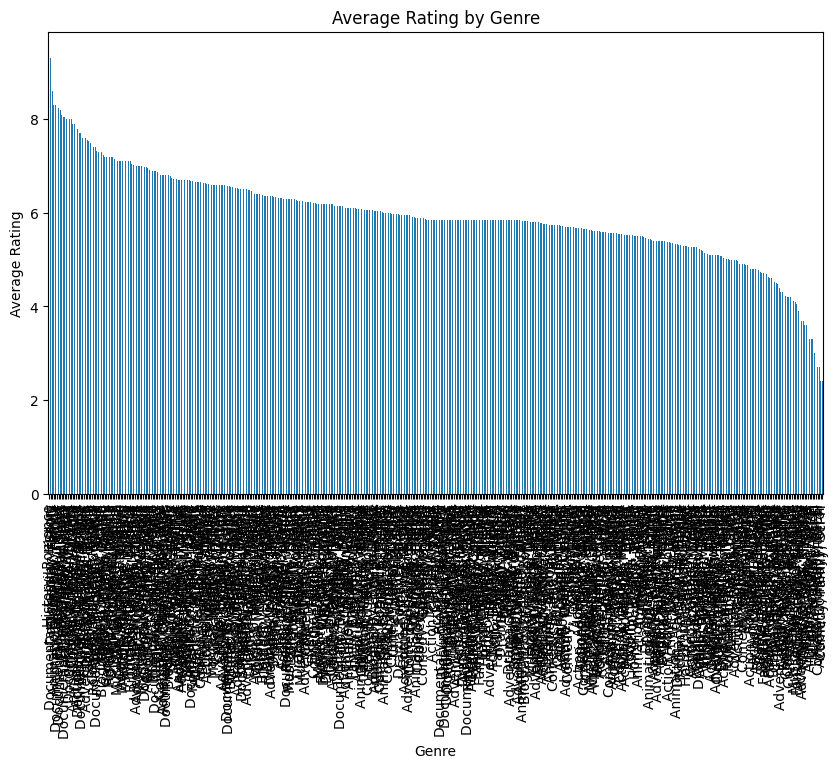

In [18]:
avg_rating_per_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_per_genre)

# Visualization
plt.figure(figsize=(10,6))
avg_rating_per_genre.plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

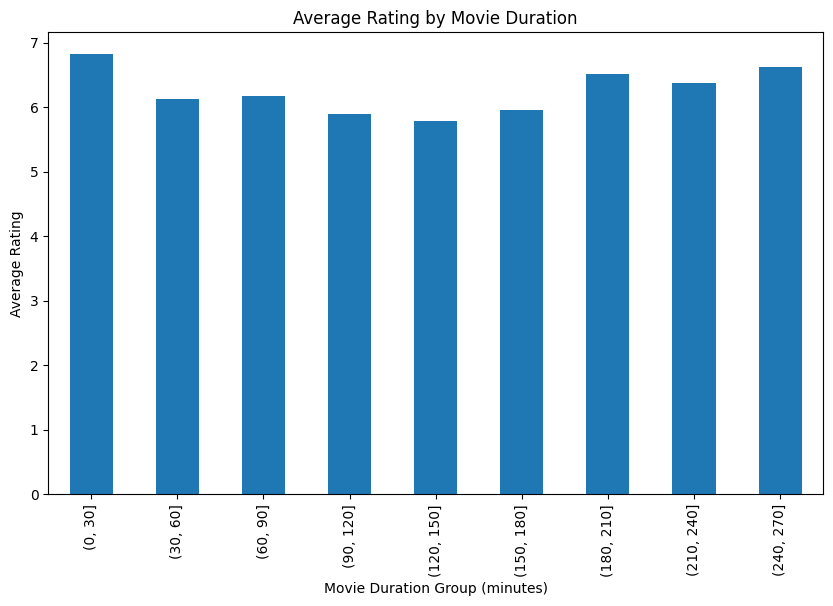

In [19]:
# Group by Duration intervals (e.g., 30 min intervals) and calculate average rating
df['Duration Group'] = pd.cut(df['Duration'], bins=np.arange(0, 300, 30))
avg_rating_by_duration = df.groupby('Duration Group')['Rating'].mean()

plt.figure(figsize=(10,6))
avg_rating_by_duration.plot(kind='bar')
plt.title('Average Rating by Movie Duration')
plt.xlabel('Movie Duration Group (minutes)')
plt.ylabel('Average Rating')
plt.show()

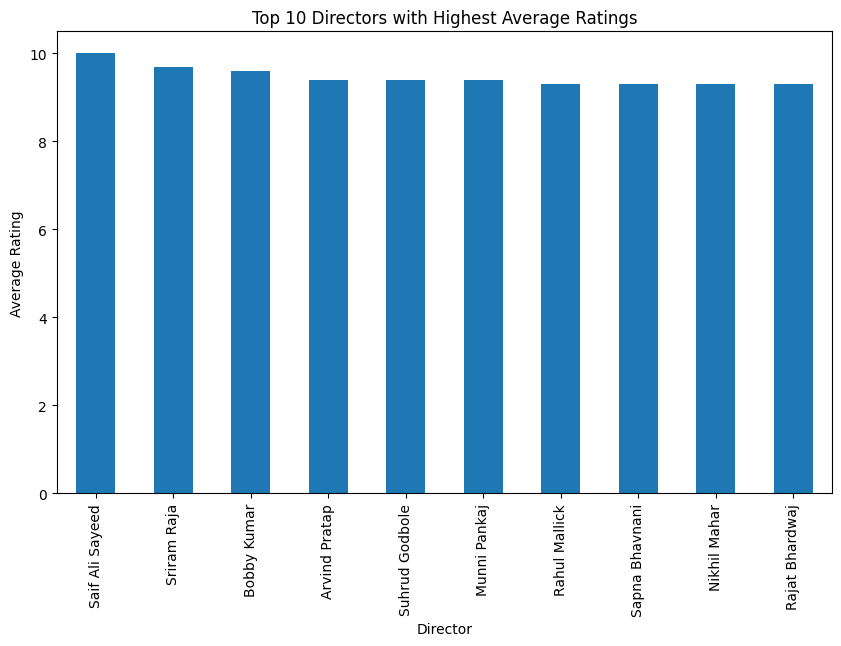

In [20]:
avg_rating_by_director = df.groupby('Director')['Rating'].mean().sort_values(ascending=False)
top_directors = avg_rating_by_director.head(10)

# Visualization
plt.figure(figsize=(10,6))
top_directors.plot(kind='bar')
plt.title('Top 10 Directors with Highest Average Ratings')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.show()

In [21]:
# Identify movies with high ratings but low votes and vice versa
high_rated_low_votes = df[(df['Rating'] >= 8.0) & (df['Votes'] < 1000)]
low_rated_high_votes = df[(df['Rating'] < 6.0) & (df['Votes'] > 10000)]

print("High-rated, low-voted movies:")
print(high_rated_low_votes[['Name', 'Rating', 'Votes']])

print("\nLow-rated, high-voted movies:")
print(low_rated_high_votes[['Name', 'Rating', 'Votes']])


High-rated, low-voted movies:
                            Name  Rating  Votes
137       A Billion Colour Story     8.1    412
151        A Gift of Love: Sifar     8.0     33
176                     AA BB KK     8.0    249
901                    Amar Prem     8.0     39
944                Ammaa Ki Boli     8.1    871
...                          ...     ...    ...
15071               Win Marathon     9.0     70
15116          Writing with Fire     8.1    106
15199                     Yatrik     8.8      8
15288  Yeh Suhaagraat Impossible     8.6    500
15470           Zindagi Ek Safar     8.2     33

[238 rows x 3 columns]

Low-rated, high-voted movies:
                                        Name  Rating   Votes
657                       Ae Dil Hai Mushkil     5.8   21661
1488                                Baaghi 3     2.1   10309
1835                               Bang Bang     5.6   22436
2170                                  Bharat     4.9   22598
2472                              

In [22]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration Group
0,,-1991,131.0,Drama,5.841621,55,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,"(120, 150]"
1,#Gadhvi (He thought he was Gandhi),-2019,109.0,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"(90, 120]"
2,#Homecoming,-2021,90.0,"Drama, Musical",5.841621,55,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,"(60, 90]"
3,#Yaaram,-2019,110.0,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"(90, 120]"
4,...And Once Again,-2010,105.0,Drama,5.841621,55,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,"(90, 120]"


## I am  using LabelEncoder to convert categorical variables like Genre, Director, and Actors into numerical values.

In [23]:
le_genre = LabelEncoder()
le_director = LabelEncoder()
le_actor1 = LabelEncoder()

df['Genre'] = le_genre.fit_transform(df['Genre'])
df['Director'] = le_director.fit_transform(df['Director'])
df['Actor 1'] = le_actor1.fit_transform(df['Actor 1'])

In [24]:
# Features (input variables)
X = df[['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1']]

# Target variable (output)
y = df['Rating']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
 #Initializing and Train the XGBoost Model

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
!pip install --upgrade xgboost
import xgboost as xgb
print(xgb.__version__)

# Load your dataset
# df = pd.read_csv('your_dataset.csv')
# X = df[features]  # Replace with your feature columns
# y = df['target']  # Replace with your target column

# Split your data (X_train, y_train, X_test, y_test) as needed

# Define your model
xg_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 2, 3, 5],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=xg_model, param_distributions=param_dist, n_iter=100,
                                    scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Evaluate the best model
best_xg_model = random_search.best_estimator_

# Predict
y_pred = best_xg_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model Mean Squared Error: {mse}")
print(f"Final Model R-Squared: {r2}")



Fitting 3 folds for each of 100 candidates, totalling 300 fits


## Model Performance

Mean Squared Error (MSE): The MSE of 0.620 indicates that, on average, the squared difference between the predicted and actual ratings is relatively low. A lower MSE value signifies that the model’s predictions are reasonably close to the true ratings. While MSE is not perfect, it shows that the model isn't too far off from predicting the actual ratings.

R-Squared (R²): The R-Squared (R²) score of 0.355 means that about 35.5% of the variance in the movie ratings can be explained by the model based on the features we used. While this shows the model has a moderate ability to explain the variation in ratings, it also indicates that 63.5% of the variance remains unexplained, suggesting that there are other factors influencing the ratings that are not captured by the current features.